In [30]:
import requests
from bs4 import BeautifulSoup

# our site of interest
site = "https://www.vdl.lu/fr/la-ville/participez-vous-aussi/report-it-signalez-un-incident"
# but the data retrieval is actually in a frame
qurl = "https://reportit.vdl.lu/frame/search.php"

#curl 'https://reportit.vdl.lu/frame/search.php?lang=fr&csrt=12099384349627835021' -X POST -H 'User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0' -H 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8' -H 'Accept-Language: en-US,en;q=0.5' -H 'Accept-Encoding: gzip, deflate, br' -H 'Content-Type: application/x-www-form-urlencoded' -H 'Origin: https://reportit.vdl.lu' -H 'Connection: keep-alive' -H 'Referer: https://reportit.vdl.lu/frame/search.php?lang=fr&csrt=12099384349627835021' -H 'Cookie: f5_cspm=1234; dtCookie=v_4_srv_8_sn_D9E4C009D2329821A1F46FAC9295C855_perc_100000_ol_0_mul_1_app-3A83b8d1fae42099b2_1_app-3Aea7c4b59f27d43eb_1_app-3Aefeee797da23f6ad_1_app-3A1305800ebd325f0f_1_rcs-3Acss_0; TS0167cc64=0165e1728cf023e9ae809d70165ab574324fb8b6774ec153ed362dd2f5e2879a25085fb1b9d0638ae637fa1f697c8c46d1d415498d; TS01546102=0165e1728c5c3e4fb5f7aac2fb030f7de5d6a7409e767880ed5140fb3fa70228a53a37ac7ab70b5ff935101e8d78e04eb72d0dfca86926360431532cacec7342dd04aca727; TS0167cc64028=0119448721ea63fe1317d6e1450e14d5f2743ea93e5298eebb8503aee695e674f92a7ee7c58ca9b624bef1d39afdc4d8075152fd7e; TS01f6b6e0=0165e1728cbcb74ec30fea344474da58881970c64acf33096185c5c1384e1a6c42232b31e1a3a19887a56b6607d35a1c7b65c0c85d556da7bd7f9b4ea876b9c6a5c8beb8d7; f5avr0281417664aaaaaaaaaaaaaaaa_cspm_=NGKJCNJLNAODCKLKCADAOKDDOPCPACDPAADAHFPKJODKGKHCMEMOKGNCPFFPPODCECNCPGNNBCNGPEAOCHGABGCPAFGAPKAMGIIEIEKPPHKGBBMGIEECLMEJPOIPNMJC' -H 'Upgrade-Insecure-Requests: 1' -H 'Sec-Fetch-Dest: iframe' -H 'Sec-Fetch-Mode: navigate' -H 'Sec-Fetch-Site: same-origin' -H 'Sec-Fetch-User: ?1' --data-raw 'search_id=1010&search_id_3f770c84fe1f5faad3b1a3f8e7f697a3=9e0dd01b2c8e98997090a052e1bafe46'

In [49]:
# get the page that we want to query
s = requests.session()

# set headers
customheaders = {
    'get': '/frame/search.php HTTP/1.1',
    'host': 'reportit.vdl.lu',
    'user-agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:123.0) Gecko/20100101 Firefox/123.0',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
    'Pragma': 'no-cache',
    'Cache-Control': 'no-cache'
                }

pageres = s.get(qurl, headers=customheaders)

# We need some of the hidden elements from the form for the query
# Extract with BS4
soup = BeautifulSoup(pageres.text, 'html.parser')

# we want the second input [1]
sid_inputs = soup.find_all('input')[1]

# extract the needed values
sid = sid_inputs.get('id')
sidval = sid_inputs.get('value')



# Now package the request for a specific report number
repnum = 1200

# using the session should automatically resend the cookies generated by the earlier request
datares = s.post(qurl, data={"search_id": repnum, sid: sidval}, headers=customheaders)


<body>
<main>
<div class="container-lg">
<div class="card mb-3 border-primary">
<div class="card-header text-white bg-primary"><b>Incident <span class="badge bg-warning text-dark">1200</span> : Le bus 215 vient de passer 2 fois devant l'arrêt eradme coque direction bascharage sans s'arrêter, c'est scandaleux!</b></div>
<div class="card-body"><div class="row">
<div class="col-xs-12 col-md-6"><div class="card mb-3">
<div class="card-body"><b>Description :</b><br/></div>
</div>
<table class="table">
<tbody>
<tr><th scope="row">Statut :</th><td><span class="badge bg-success">Terminé</span></td></tr>
<tr><th scope="row">Envoyé le :</th><td>10.06.2015 17:54</td></tr>
</tbody>
</table></div>
<div class="col-xs-12 col-md-6">
</div>
</div>
<div class="row">
<div class="col-xs-12 col-md-6"><br/></div>
<div class="col-xs-12 col-md-6"><br/><p><b>Commentaires: </b></p><div class="card mb-3">
<div class="card-header text-dark bg-light">Terminé par <i>Service Autobus</i> le 25.06.2015 11:43</div>
<di
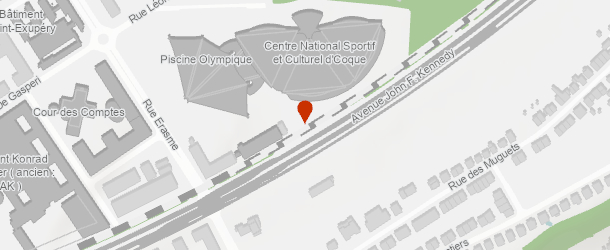

In [51]:
soup = BeautifulSoup(datares.text, 'html.parser')
soup.body